# Цели и задачи
### Представлен набор данных с результатами экзаменов по математике.
### Необходимо понять, что влияет на итоговую оценку

# Импортируем необходлимые библиотеки

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# Загружаем данные

In [173]:
# Загружаем данные
stud_math = pd.read_csv('stud_math.csv')
# Созадем список с названиями столбцов
name_col = stud_math.columns
# Создадим список значимых параметров
significant = []

# Используемые функции

In [174]:
# Информация о текстовых столбцах, c - название столбца.
def inform_str(c):
    # Покажем первые 10 значений
    print('Первые 10 строк:')
    display(stud_math.loc[:, [c]].head(10))

    # Посчитаем уникальные значение
    print('Количество уникальных значений:')
    display(pd.DataFrame(pd.value_counts(stud_math[c])))

    # Посмотрим общую статистику
    print('Общая статистика:')
    display(stud_math.loc[:, [c]].info())


# Информация о числовых столбцах, c - название столбца.
def inform_num(c):
    # Покажем первые 10 значений
    print('Первые 10 строк')
    display(stud_math.loc[:, [c]].head(10))

    # Посчитаем уникальные значение
    print('Количество уникальных значений:')
    display(pd.DataFrame(pd.value_counts(stud_math[c])))

    # Посмотрим общую статистику
    print('Общая статистика:')
    display(stud_math.loc[:, [c]].info())

    # Описательная статистика
    print('Описательная статистика:')
    display(stud_math.loc[:, [c]].describe())

    # Построим гистограмму
    print('Гистограмма')
    display(stud_math.loc[:, [c]].hist())


# Информация о столбцах, n - номер столбца с нуля.
def inform(n):
    if type(stud_math.iloc[10, n]) == str:
        print('Столбец', '№', n, name_col[n], 'является строковым')
        print('Первые 5 строк:')
        display(stud_math.loc[:, [name_col[n]]].head(5))
        print('Количество уникальных значений:')
        display(pd.DataFrame(pd.value_counts(stud_math[name_col[n]])))
        print('Общая статистика:')
        display(stud_math.loc[:, [name_col[n]]].info())
    else:
        print('Столбец', '№', n, name_col[n], 'является числовым')
        print('Первые 5 строк:')
        display(stud_math.loc[:, [name_col[n]]].head(5))
        print('Количество уникальных значений:')
        display(pd.DataFrame(pd.value_counts(stud_math[name_col[n]])))
        print('Общая статистика:')
        display(stud_math.loc[:, [name_col[n]]].info())
        print('Описательная статистика:')
        display(stud_math.loc[:, [name_col[n]]].describe())
        print('Гистограмма')
        display(stud_math.loc[:, [name_col[n]]].hist())


# Построение графиков "ящик с усами".
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# Тест на наличие статистически значимых различий
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score'], nan_policy = 'omit').pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print( 'Найдены статистически значимые различия для колонки', column )
            break

# Предпросмотр данных

In [175]:
# Посмотрим на данные
display(stud_math.head(20))

# Посмотрим общую статистику
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Краткое описание
Есть неописанный столбец с названием "studytime, granular".
Есть пропуски во многих стобцах.
Имеются столбцы как числовые (13)  так и строковые(17).

# Первичная информация по каждому столбцу циклом

Столбец № 0 school является строковым
Первые 10 строк:


,school
0,GP
1,GP
2,GP
3,GP
4,GP
5,GP
6,GP
7,GP
8,GP
9,GP


Количество уникальных значений:


,school
GP,349
MS,46


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 1 sex является строковым
Первые 10 строк:


,sex
0,F
1,F
2,F
3,F
4,F
5,M
6,M
7,F
8,M
9,M


Количество уникальных значений:


,sex
F,208
M,187


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 2 age является числовым
Первые 10 строк


,age
0,18
1,17
2,15
3,15
4,16
5,16
6,16
7,17
8,15
9,15


Количество уникальных значений:


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,age
count,395.000000
mean,16.696203
std,1.276043
min,15.000000
25%,16.000000
50%,17.000000
75%,18.000000
max,22.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF3ED7648>]],
      dtype=object)

Столбец № 3 address является строковым
Первые 10 строк:


,address
0,U
1,U
2,U
3,U
4,U
5,U
6,NaN
7,U
8,U
9,U


Количество уникальных значений:


,address
U,295
R,83


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 4 famsize является строковым
Первые 10 строк:


,famsize
0,NaN
1,GT3
2,LE3
3,GT3
4,GT3
5,LE3
6,LE3
7,GT3
8,LE3
9,NaN


Количество уникальных значений:


,famsize
GT3,261
LE3,107


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 5 Pstatus является строковым
Первые 10 строк:


,Pstatus
0,A
1,NaN
2,T
3,T
4,T
5,T
6,T
7,A
8,A
9,NaN


Количество уникальных значений:


,Pstatus
T,314
A,36


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 6 Medu является числовым
Первые 10 строк


,Medu
0,4.0
1,1.0
2,1.0
3,4.0
4,3.0
5,4.0
6,2.0
7,4.0
8,3.0
9,3.0


Количество уникальных значений:


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,Medu
count,392.000000
mean,2.750000
std,1.098127
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF3EBF5C8>]],
      dtype=object)

Столбец № 7 Fedu является числовым
Первые 10 строк


,Fedu
0,4.0
1,1.0
2,1.0
3,2.0
4,3.0
5,3.0
6,2.0
7,4.0
8,2.0
9,4.0


Количество уникальных значений:


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,Fedu
count,371.000000
mean,2.614555
std,2.228732
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,40.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF5779AC8>]],
      dtype=object)

Столбец № 8 Mjob является строковым
Первые 10 строк:


,Mjob
0,at_home
1,at_home
2,at_home
3,health
4,other
5,services
6,other
7,other
8,services
9,other


Количество уникальных значений:


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 9 Fjob является строковым
Первые 10 строк:


,Fjob
0,teacher
1,other
2,other
3,NaN
4,other
5,other
6,other
7,teacher
8,other
9,other


Количество уникальных значений:


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 10 reason является строковым
Первые 10 строк:


,reason
0,course
1,course
2,other
3,home
4,home
5,reputation
6,home
7,home
8,home
9,home


Количество уникальных значений:


,reason
course,137
home,104
reputation,103
other,34


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 11 guardian является строковым
Первые 10 строк:


,guardian
0,mother
1,father
2,mother
3,mother
4,father
5,mother
6,mother
7,mother
8,mother
9,mother


Количество уникальных значений:


,guardian
mother,250
father,86
other,28


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 12 traveltime является числовым
Первые 10 строк


,traveltime
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,2.0
8,1.0
9,1.0


Количество уникальных значений:


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,traveltime
count,367.000000
mean,1.438692
std,0.694181
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF575CC88>]],
      dtype=object)

Столбец № 13 studytime является числовым
Первые 10 строк


,studytime
0,2.0
1,2.0
2,2.0
3,3.0
4,2.0
5,2.0
6,2.0
7,2.0
8,2.0
9,2.0


Количество уникальных значений:


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,studytime
count,388.000000
mean,2.038660
std,0.842078
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF53E6808>]],
      dtype=object)

Столбец № 14 failures является числовым
Первые 10 строк


,failures
0,0.0
1,0.0
2,3.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


Количество уникальных значений:


,failures
0.0,293
1.0,49
2.0,16
3.0,15


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,failures
count,373.000000
mean,0.337802
std,0.743135
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF4FECFC8>]],
      dtype=object)

Столбец № 15 schoolsup является строковым
Первые 10 строк:


,schoolsup
0,yes
1,no
2,yes
3,no
4,no
5,no
6,no
7,yes
8,no
9,no


Количество уникальных значений:


,schoolsup
no,335
yes,51


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 16 famsup является строковым
Первые 10 строк:


,famsup
0,no
1,yes
2,no
3,yes
4,yes
5,yes
6,no
7,yes
8,yes
9,yes


Количество уникальных значений:


,famsup
yes,219
no,137


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 17 paid является строковым
Первые 10 строк:


,paid
0,no
1,no
2,NaN
3,yes
4,yes
5,yes
6,no
7,no
8,yes
9,yes


Количество уникальных значений:


,paid
no,200
yes,155


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 18 activities является строковым
Первые 10 строк:


,activities
0,no
1,no
2,no
3,yes
4,no
5,yes
6,no
7,no
8,no
9,yes


Количество уникальных значений:


,activities
yes,195
no,186


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 19 nursery является строковым
Первые 10 строк:


,nursery
0,yes
1,no
2,yes
3,yes
4,yes
5,yes
6,yes
7,yes
8,yes
9,yes


Количество уникальных значений:


,nursery
yes,300
no,79


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 20 studytime, granular является числовым
Первые 10 строк


,"studytime, granular"
0,-6.0
1,-6.0
2,-6.0
3,-9.0
4,-6.0
5,-6.0
6,-6.0
7,-6.0
8,-6.0
9,-6.0


Количество уникальных значений:


,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,"studytime, granular"
count,388.000000
mean,-6.115979
std,2.526235
min,-12.000000
25%,-6.000000
50%,-6.000000
75%,-3.000000
max,-3.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF501E308>]],
      dtype=object)

Столбец № 21 higher является строковым
Первые 10 строк:


,higher
0,yes
1,yes
2,yes
3,yes
4,yes
5,yes
6,yes
7,yes
8,yes
9,yes


Количество уникальных значений:


,higher
yes,356
no,19


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 22 internet является строковым
Первые 10 строк:


,internet
0,NaN
1,yes
2,yes
3,yes
4,no
5,yes
6,yes
7,no
8,yes
9,yes


Количество уникальных значений:


,internet
yes,305
no,56


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 23 romantic является строковым
Первые 10 строк:


,romantic
0,no
1,no
2,NaN
3,yes
4,no
5,no
6,no
7,no
8,no
9,no


Количество уникальных значений:


,romantic
no,240
yes,124


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Столбец № 24 famrel является числовым
Первые 10 строк


,famrel
0,4.0
1,5.0
2,4.0
3,3.0
4,4.0
5,5.0
6,4.0
7,4.0
8,NaN
9,5.0


Количество уникальных значений:


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,famrel
count,368.000000
mean,3.937500
std,0.927277
min,-1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF504C2C8>]],
      dtype=object)

Столбец № 25 freetime является числовым
Первые 10 строк


,freetime
0,3.0
1,3.0
2,3.0
3,2.0
4,3.0
5,4.0
6,4.0
7,1.0
8,2.0
9,5.0


Количество уникальных значений:


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,freetime
count,384.000000
mean,3.231771
std,0.993940
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF504CE88>]],
      dtype=object)

Столбец № 26 goout является числовым
Первые 10 строк


,goout
0,4.0
1,3.0
2,2.0
3,2.0
4,2.0
5,2.0
6,4.0
7,4.0
8,2.0
9,1.0


Количество уникальных значений:


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,goout
count,387.000000
mean,3.105943
std,1.115896
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF5490DC8>]],
      dtype=object)

Столбец № 27 health является числовым
Первые 10 строк


,health
0,3.0
1,3.0
2,3.0
3,5.0
4,5.0
5,5.0
6,3.0
7,1.0
8,1.0
9,5.0


Количество уникальных значений:


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,health
count,380.000000
mean,3.531579
std,1.396019
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF54DF288>]],
      dtype=object)

Столбец № 28 absences является числовым
Первые 10 строк


,absences
0,6.0
1,4.0
2,10.0
3,2.0
4,4.0
5,10.0
6,0.0
7,6.0
8,0.0
9,0.0


Количество уникальных значений:


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,absences
count,383.000000
mean,7.279373
std,23.465197
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,385.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF553EBC8>]],
      dtype=object)

Столбец № 29 score является числовым
Первые 10 строк


,score
0,30.0
1,30.0
2,50.0
3,75.0
4,50.0
5,75.0
6,55.0
7,30.0
8,95.0
9,75.0


Количество уникальных значений:


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,score
count,389.000000
mean,52.262211
std,22.919022
min,0.000000
25%,40.000000
50%,55.000000
75%,70.000000
max,100.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF5595B08>]],
      dtype=object)

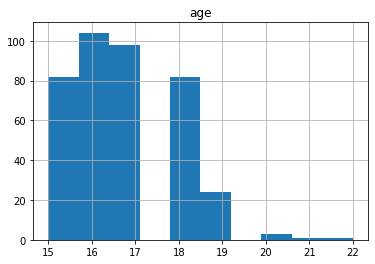

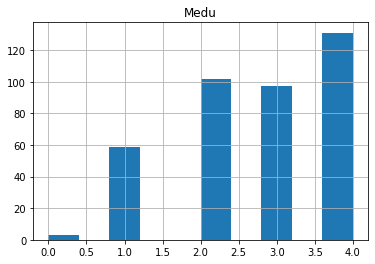

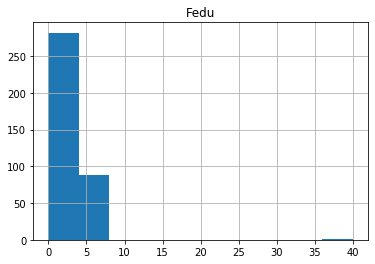

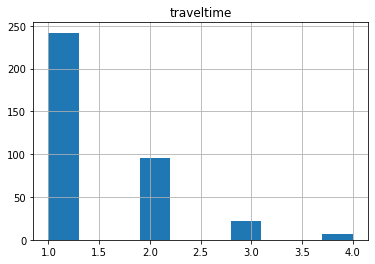

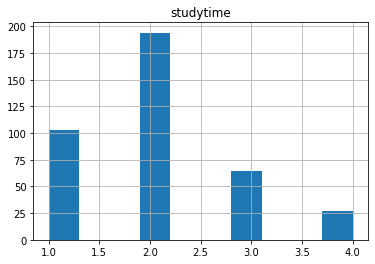

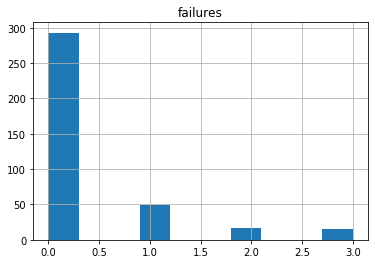

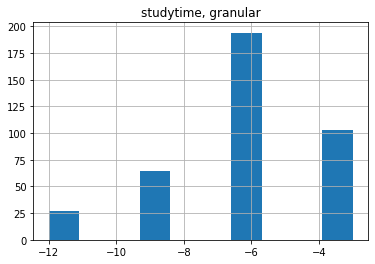

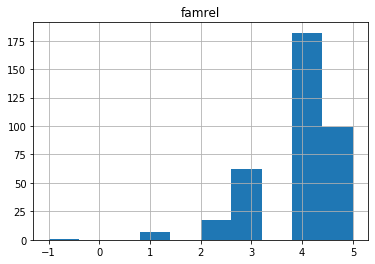

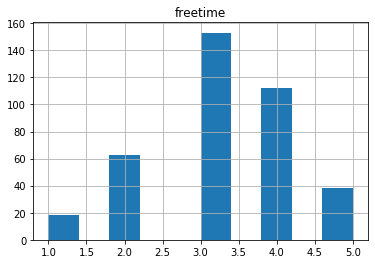

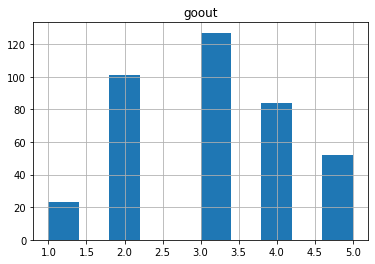

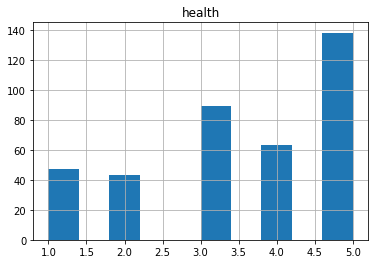

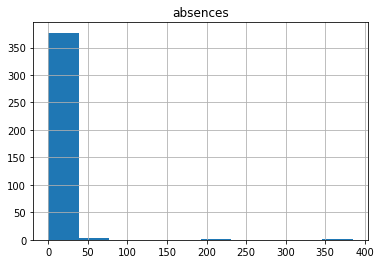

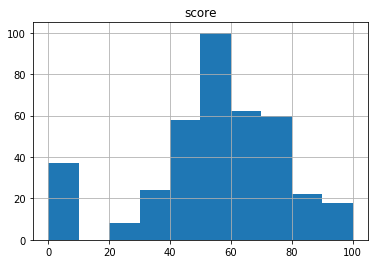

In [176]:
n = 0
for i in stud_math.columns:
    if type(stud_math.iloc[10, n]) == str:
            print('Столбец', '№', n, i, 'является строковым')
            inform_str(i)
    else:
        print('Столбец', '№', n, i, 'является числовым')
        inform_num(i)
    n += 1

# Однако циклом не совсем удобно, пройдемся функцией inform по всем столбцам по очереди, построим боксплоты, проверим на наличие статичтически значимых различий.

Столбец № 0 school является строковым
Первые 5 строк:


,school
0,GP
1,GP
2,GP
3,GP
4,GP


Количество уникальных значений:


,school
GP,349
MS,46


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

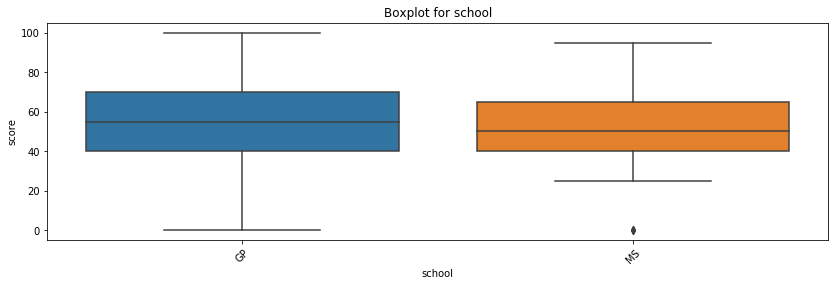

In [177]:
n = 0

inform(n)
get_boxplot(name_col[n])
get_stat_d(name_col[n])

В столбце №1 "school" пустых значение нет. Вся представленная выборка делится на две школы.
88% в GP, 12% в MS
В целом ученики учатся одинаково, однако, кажется, что в школе MS ученики учатся чуть хуже.
Но статистически значимых различий нет.

Столбец № 1 sex является строковым
Первые 5 строк:


,sex
0,F
1,F
2,F
3,F
4,F


Количество уникальных значений:


,sex
F,208
M,187


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

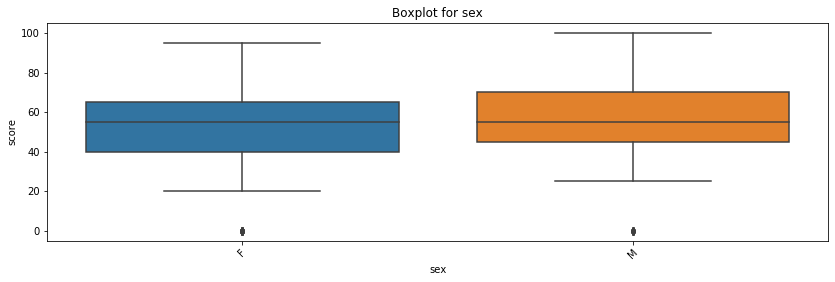

In [178]:
n = 1

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

В столбце №2 пустых значений нет.
Как и предполагалось, есть два значения: м и ж. 53% ж и 47% м.
Девочки и мальчики учатся примерно одинаково. Однако, кажется, что мальчики чуть лучше. Но статистически значимых различий нет.

Столбец № 2 age является числовым
Первые 5 строк:


,age
0,18
1,17
2,15
3,15
4,16


Количество уникальных значений:


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,age
count,395.000000
mean,16.696203
std,1.276043
min,15.000000
25%,16.000000
50%,17.000000
75%,18.000000
max,22.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF57D9FC8>]],
      dtype=object)

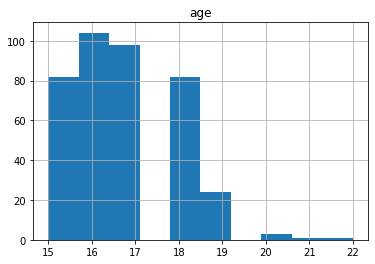

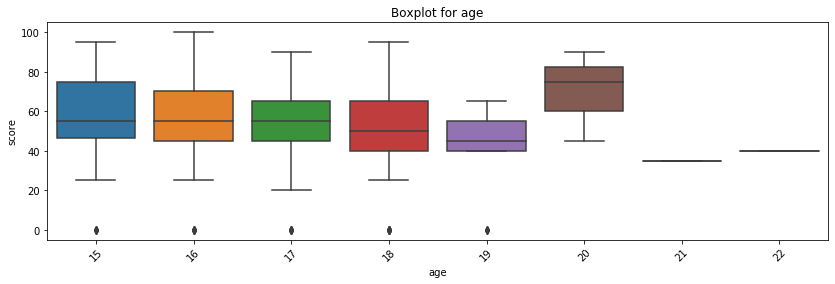

In [179]:
n = 2

inform(n)
get_boxplot(name_col[n])

В колонке 3 пустых значений нет.
Представлены ученики в возрасте от 15 до 22 лет. 
Средний возраст 17 лет, медианный так же 17 лет.
Лучше всех учатся 20 летние, хотя их всего трое, и это малая часть статистики
В целом чем старше, тем хучже учится человек. Проверим корреляцию в конце.

In [180]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 3 address является строковым
Первые 5 строк:


,address
0,U
1,U
2,U
3,U
4,U


Количество уникальных значений:


,address
U,295
R,83


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

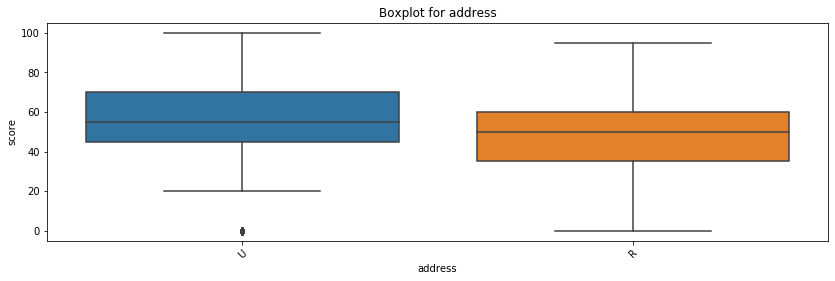

Найдены статистически значимые различия для колонки address


In [181]:
n = 3

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

Имеются пустые значения в количестве 17.
78% живут в городе, 22 за городом.
От пустых значений будем избавляться в конце и оптом, если будем.
Те кто живут в городе учатся лучше. Различия считаются статистически значимыми.

In [182]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 4 famsize является строковым
Первые 5 строк:


,famsize
0,NaN
1,GT3
2,LE3
3,GT3
4,GT3


Количество уникальных значений:


,famsize
GT3,261
LE3,107


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

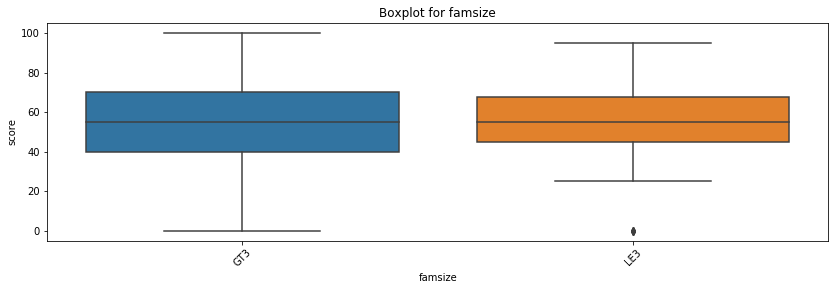

In [183]:
n = 4

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

Пустых значений 27.
71 % из семей, где больше 3 членов.
Медианное значение одинаковое, среднее тоже. Маловероянто, что размер семьи сильно влияет на оценку. Статистически значимых различий не выявлено.

Столбец № 5 Pstatus является строковым
Первые 5 строк:


,Pstatus
0,A
1,NaN
2,T
3,T
4,T


Количество уникальных значений:


,Pstatus
T,314
A,36


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

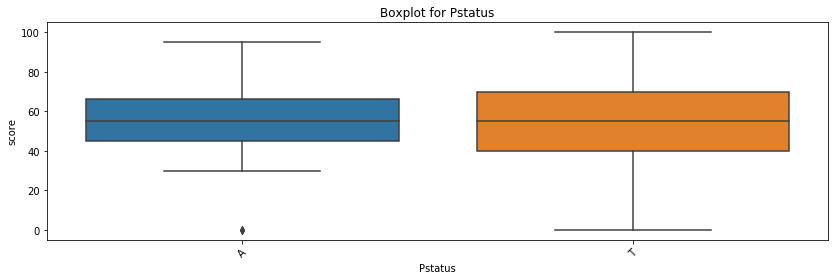

In [184]:
n = 5

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

45 пустых значений.
90% родителей живут вместе.
Медианное значение схоже, в целом мало влияет на оценку. Статистически значимых различий не выявлено.

Столбец № 6 Medu является числовым
Первые 5 строк:


,Medu
0,4.0
1,1.0
2,1.0
3,4.0
4,3.0


Количество уникальных значений:


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,Medu
count,392.000000
mean,2.750000
std,1.098127
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF57D4FC8>]],
      dtype=object)

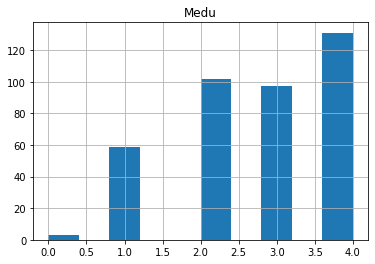

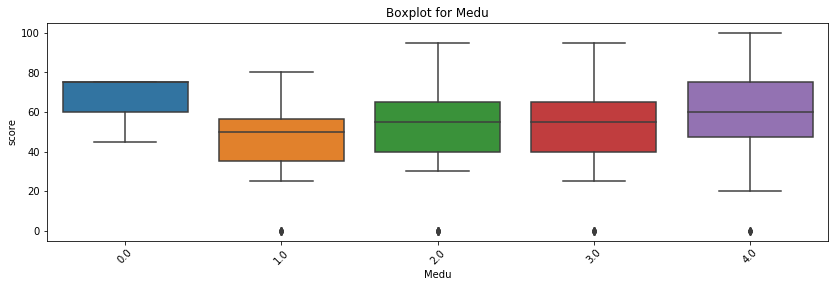

In [185]:
n = 6

inform(n)
get_boxplot(name_col[n])

3 пропуска данных.
Большинство матерей имеют высшее образование. Без образования менее процента.
Выбросов не отмечается.
Чем выше образование матери, тем выше оценка ребенка.

In [186]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 7 Fedu является числовым
Первые 5 строк:


,Fedu
0,4.0
1,1.0
2,1.0
3,2.0
4,3.0


Количество уникальных значений:


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,Fedu
count,371.000000
mean,2.614555
std,2.228732
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,40.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF5714948>]],
      dtype=object)

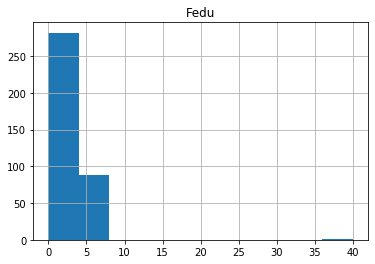

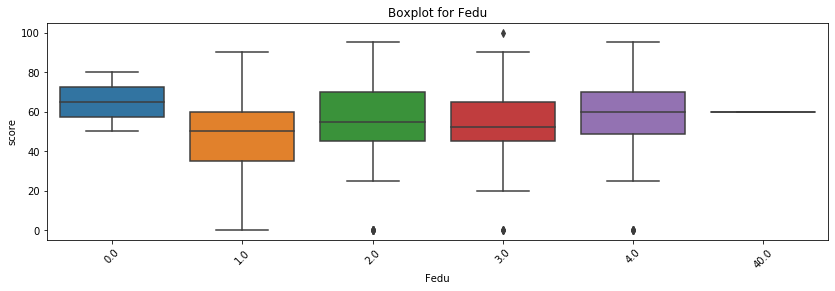

In [187]:
n = 7

inform(n)
get_boxplot(name_col[n])

Пустых значений 24.
Есть один вылет, заменим его на пустое значение.Вылет очевидно за пределами возможных значений.

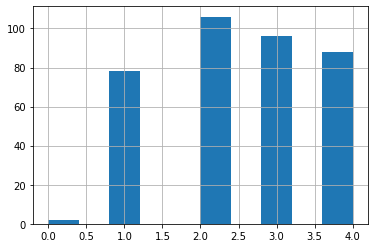

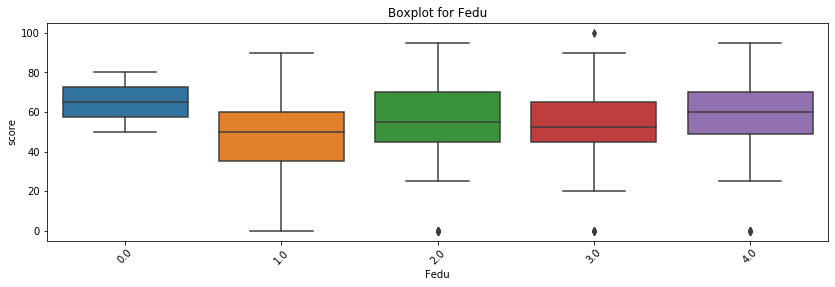

In [188]:
# Убираем вылет
stud_math.loc[stud_math['Fedu'] > 4] = None
# Построим гистограмму
display(stud_math.Fedu.hist())
# Построим ящик с усами
get_boxplot(name_col[n])

Большинство отцов имеют 9 классов образования, без образования меньше процента.
24 пропуска.
Большинство имеет образование 9 классов.
Без образования меньше процента.
В целом отмечается влияние на оценки ребенка. Чем выше образование отца, тем лучше оценка, но не так сильно как образование матери.

In [189]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 8 Mjob является строковым
Первые 5 строк:


,Mjob
0,at_home
1,at_home
2,at_home
3,health
4,other


Количество уникальных значений:


,Mjob
other,133
services,97
at_home,58
teacher,55
health,32


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

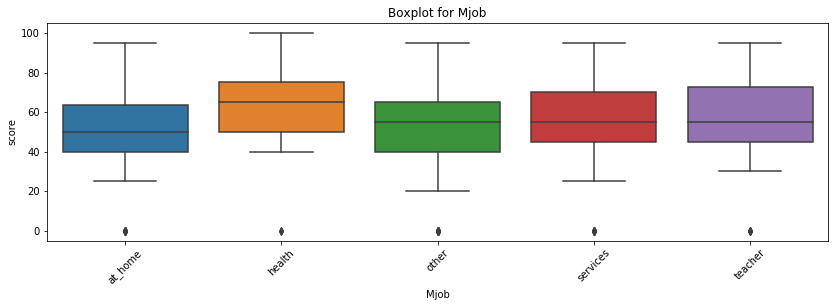

Найдены статистически значимые различия для колонки Mjob


In [190]:
n = 8

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

20 пропусков.
Большинство не являются работниками указанных категорий.
Оценки выше у тех детей, чья мать работает в сфере здравооххранения. Статистически значимые различия отмечены.

In [191]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 9 Fjob является строковым
Первые 5 строк:


,Fjob
0,teacher
1,other
2,other
3,NaN
4,other


Количество уникальных значений:


,Fjob
other,196
services,102
teacher,29
at_home,16
health,15


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    358 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

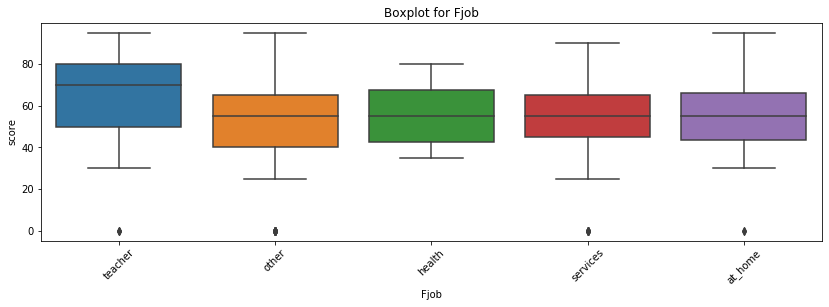

In [192]:
n = 9

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

Пропусков 37.
Большинство не связаны с указаными специальностями.
Оценки лучше у учеников, чьи отцы рабоатют в сфере образования. Однако, статистически значимых различий не выявлено, ввиду малого количекства выборки из отцов-учителей. Мы не можем использовать это в дальнейшем, однако возможно необходимо провести дополнительный исследования в данном направлении чтобы дополнить выборку.

Столбец № 10 reason является строковым
Первые 5 строк:


,reason
0,course
1,course
2,other
3,home
4,home


Количество уникальных значений:


,reason
course,137
home,104
reputation,102
other,34


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  377 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

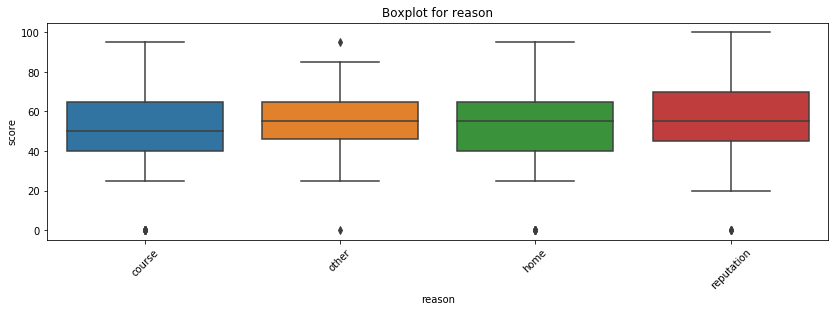

In [193]:
n = 10

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

18 пропусков.
Большинство выбирали школы в связи с ее образовательной программой.
В целом причина выбора школы не сильно влияет на оценки. Статистически значимых различий не выявлено.

Столбец № 11 guardian является строковым
Первые 5 строк:


,guardian
0,mother
1,father
2,mother
3,mother
4,father


Количество уникальных значений:


,guardian
mother,250
father,85
other,28


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  363 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

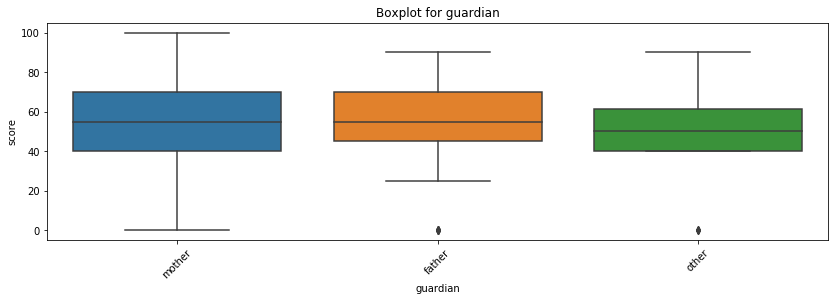

In [194]:
n = 11

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

32 пустых значения.
В основном опекун - мать.
Если опекун ребенка отец или мать - он учится лучше, чем если бы опекуном был кто-то еще. Однако, статистически значимых различий не выявлено, ввиду малого количекства выборки из оепекунов отцов и остальных. Мы не можем использовать это в дальнейшем, однако возможно необходимо провести дополнительный исследования в данном направлении чтобы дополнить выборку.

Проделаем тест, чтобы понять есть-ли различия в оценках в тех случаях, когда опекун мать или отец в отличии от тех случаев, когда опекун кто-то другой.

In [195]:
# Для этого создадим серию из колонки "guardian", где значения
# "father" или "mother" будут заменены на "parent":
# Вырезаем отдельно колонку
guardian = stud_math['guardian']
# Переводим в список, чтобы не париться по поводу пропущенных значений и изменения исходного ДФ
guardian = list(guardian)
# Вводим переменную для счета в цикле
k = 0
# Пишим цикл для замены
for i in guardian:
    if i == 'mother':
        guardian[k] = 'parent'
    elif i == 'father':
        guardian[k] = 'parent'
    k+=1
# Снова переводим в серию Пандас.
guardian_par = pd.Series(guardian)
# Прилепим новый столбец к нашему датафрейму для облегчения анализа
stud_math['guardian_par'] = guardian_par
# Обновим name_col
name_col = stud_math.columns

Столбец № 30 guardian_par является строковым
Первые 5 строк:


,guardian_par
0,parent
1,parent
2,parent
3,parent
4,parent


Количество уникальных значений:


,guardian_par
parent,335
other,28


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   guardian_par  363 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

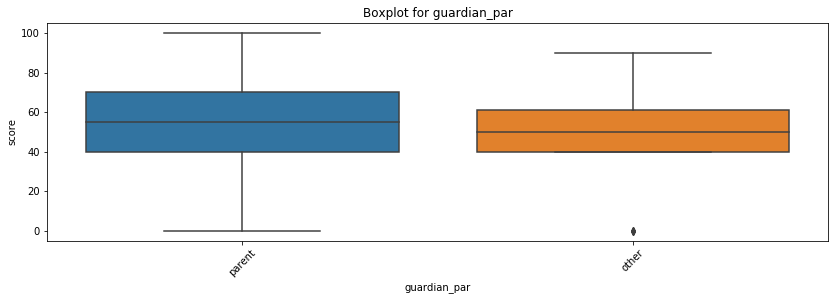

In [196]:
# Проведём анализ обновленной серии
n = 30
inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

Финт не прошёл, различие, по всей видимости, в размере выборки для остальных опекунов. Статистически значимых различий не выявлено.

Столбец № 12 traveltime является числовым
Первые 5 строк:


,traveltime
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0


Количество уникальных значений:


,traveltime
1.0,242
2.0,96
3.0,21
4.0,7


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  366 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,traveltime
count,366.000000
mean,1.434426
std,0.690297
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF54568C8>]],
      dtype=object)

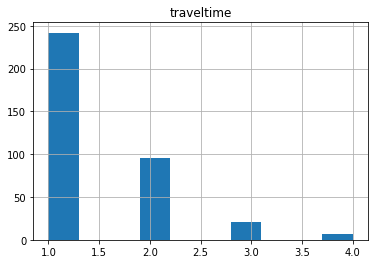

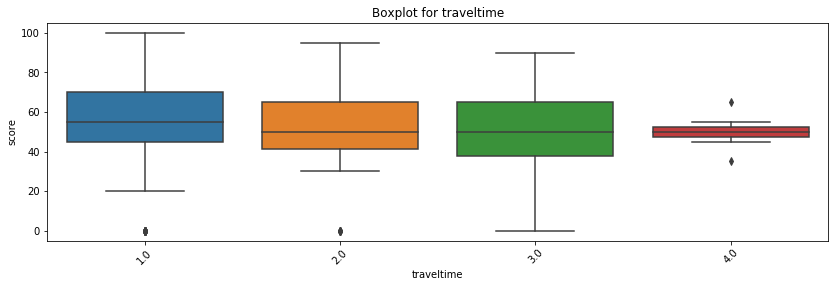

In [197]:
n = 12

inform(n)
get_boxplot(name_col[n])

Пропусков 29.
Подавляющее большинство детей живут рядом со школой.
Прослеживается корреляция: чем ближе, тем лучше учится. Возможно дело выборки. Я бы не особо доверял этому параметру. Пополним список, и проверим его на корреляцию.

In [198]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 13 studytime является числовым
Первые 5 строк:


,studytime
0,2.0
1,2.0
2,2.0
3,3.0
4,2.0


Количество уникальных значений:


,studytime
2.0,194
1.0,103
3.0,63
4.0,27


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,studytime
count,387.000000
mean,2.036176
std,0.841744
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF557A988>]],
      dtype=object)

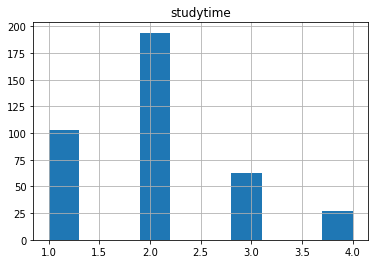

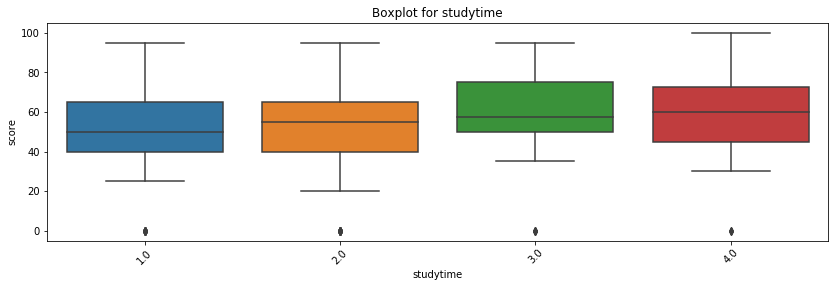

In [199]:
n = 13

inform(n)
get_boxplot(name_col[n])

Пропусков 8.
Большинство занимается 2 - 5 чсасов помимо школы.
Есть взаимосвязь между временем на дополнительную учебу и оценками, чем больше ученик тратит времени вне школы на занятия, тем лучше его оценка.
Я бы советовал заниматься в районе часа, большее время не дает значительнго улучшения оценки.

In [200]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 14 failures является числовым
Первые 5 строк:


,failures
0,0.0
1,0.0
2,3.0
3,0.0
4,0.0


Количество уникальных значений:


,failures
0.0,292
1.0,49
2.0,16
3.0,15


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  372 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,failures
count,372.000000
mean,0.338710
std,0.743929
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF5922AC8>]],
      dtype=object)

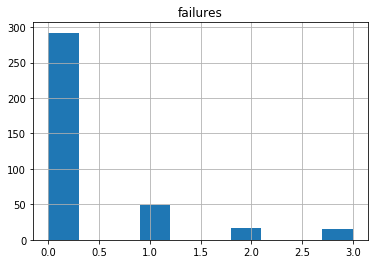

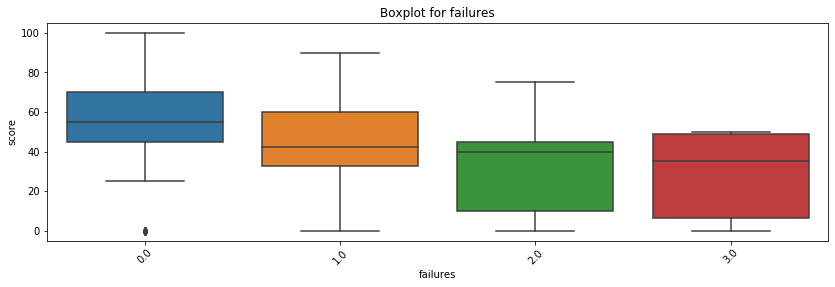

In [201]:
n = 14

inform(n)
get_boxplot(name_col[n])

Вылетов нет.
Пропусков 23.
Большинство не имеет неудач вне учебы.
Чем меньше стресса, тем лучше оценки.

In [202]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 15 schoolsup является строковым
Первые 5 строк:


,schoolsup
0,yes
1,no
2,yes
3,no
4,no


Количество уникальных значений:


,schoolsup
no,334
yes,51


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  385 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

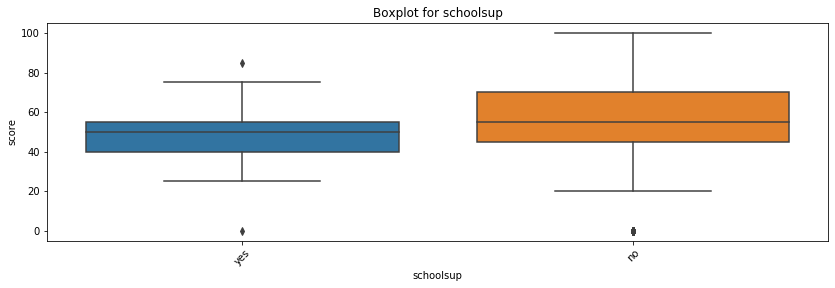

In [203]:
n = 15

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

Пропусков 10.
В онсновном ученики не имеют доп. поддежки вне семьи.
Как не странно, но дополнительная образовательная поддержка не дает ощутимых результатов.
Другой вопрос как бы учились те, кому оказывается поддержка без нее.
Статистически значимых различий не выявлено.

Столбец № 16 famsup является строковым
Первые 5 строк:


,famsup
0,no
1,yes
2,no
3,yes
4,yes


Количество уникальных значений:


,famsup
yes,218
no,137


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

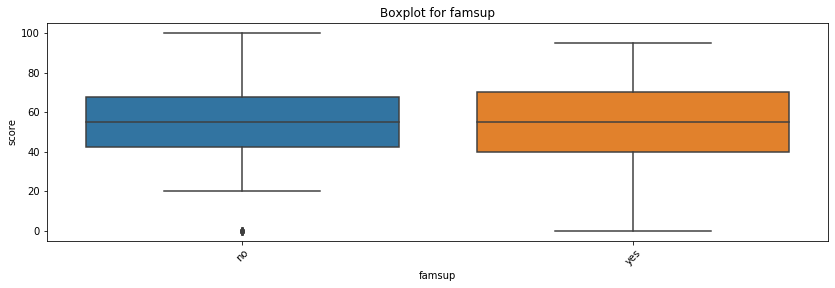

In [204]:
n = 16

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

Пропусков 40.
В основном ученики имеют семейную поддержку в образовании.
Семейная помощь в образовании не сказывается на оценках. Статистически значимых различий не выявлено.

Столбец № 17 paid является строковым
Первые 5 строк:


,paid
0,no
1,no
2,NaN
3,yes
4,yes


Количество уникальных значений:


,paid
no,199
yes,155


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    354 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

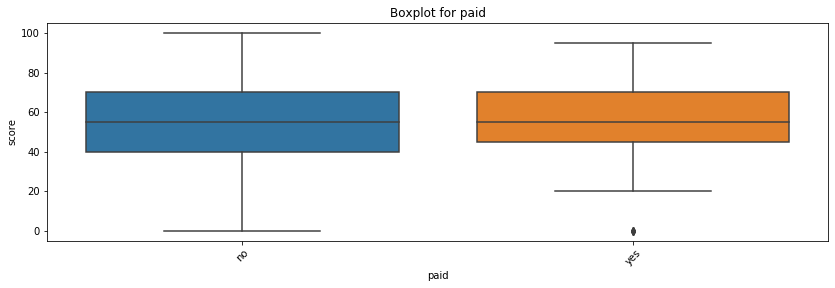

In [205]:
n = 17

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

Пропусков 41.
Большинство не имеет доп. занятий по математике.
Дополнительные платные занятие сильно не влияют на результаты.
Но как бы учились те, кто сдает математику без этих занятий?
Статистически значимых различий не выявлено.

Столбец № 18 activities является строковым
Первые 5 строк:


,activities
0,no
1,no
2,no
3,yes
4,no


Количество уникальных значений:


,activities
yes,194
no,186


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  380 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

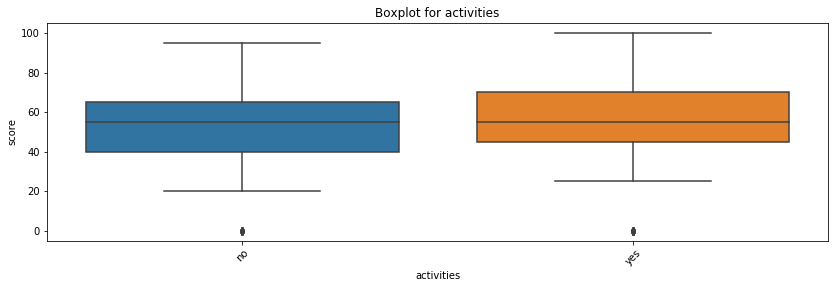

In [206]:
n = 18

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

Пропусков 15
Большинство чем-то занимается вне школы, но ответы разделены приблизителньо пополам.
Наличие внеучебных занятий слегка улучшает результаты, однако статистически значимых различий не выявлено.

Столбец № 19 nursery является строковым
Первые 5 строк:


,nursery
0,yes
1,no
2,yes
3,yes
4,yes


Количество уникальных значений:


,nursery
yes,299
no,79


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

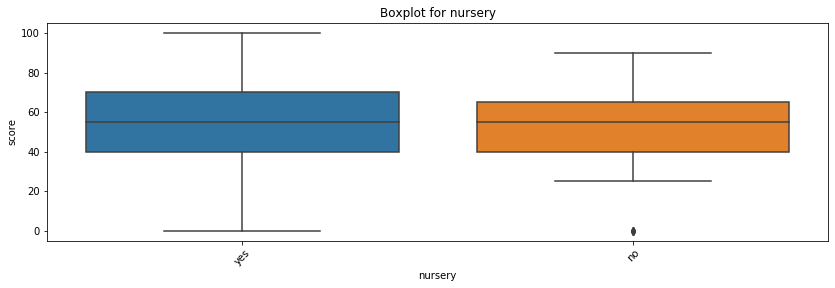

In [207]:
n = 19

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

Пропусков 17.
Большинство посещали детский сад.
Посещение детского сада не влияет на оценку. Статистически значимых различий не выявлено.

Столбец № 20 studytime, granular является числовым
Первые 5 строк:


,"studytime, granular"
0,-6.0
1,-6.0
2,-6.0
3,-9.0
4,-6.0


Количество уникальных значений:


,"studytime, granular"
-6.0,194
-3.0,103
-9.0,63
-12.0,27


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,"studytime, granular"
count,387.000000
mean,-6.108527
std,2.525231
min,-12.000000
25%,-6.000000
50%,-6.000000
75%,-3.000000
max,-3.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF58B1608>]],
      dtype=object)

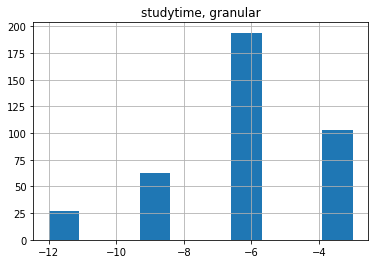

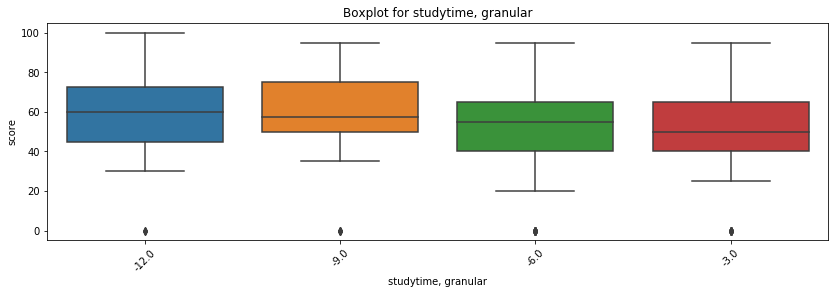

In [208]:
n = 20

inform(n)
get_boxplot(name_col[n])

Пропусков 8.
Распределено в интервале от -3 до -12, среднее и медианное -6. Большинство -6.
Если значение меньще -9, то оценки хуже.
Не понятно что это, хотя влияет на оценку.

In [209]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 21 higher является строковым
Первые 5 строк:


,higher
0,yes
1,yes
2,yes
3,yes
4,yes


Количество уникальных значений:


,higher
yes,355
no,19


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  374 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

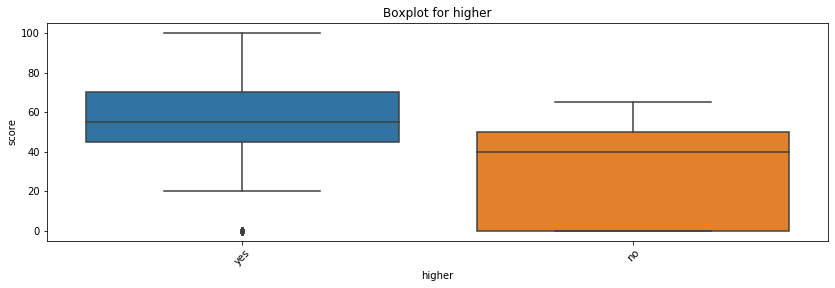

Найдены статистически значимые различия для колонки higher


In [210]:
n = 21

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

Пропусков 21.
Большинство хочет получить высшее образование.
Намерение получить высшее образование заставляет хорошо учить математику. Очевидны статистически значимые различия.

In [211]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 22 internet является строковым
Первые 5 строк:


,internet
0,NaN
1,yes
2,yes
3,yes
4,no


Количество уникальных значений:


,internet
yes,304
no,56


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  360 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

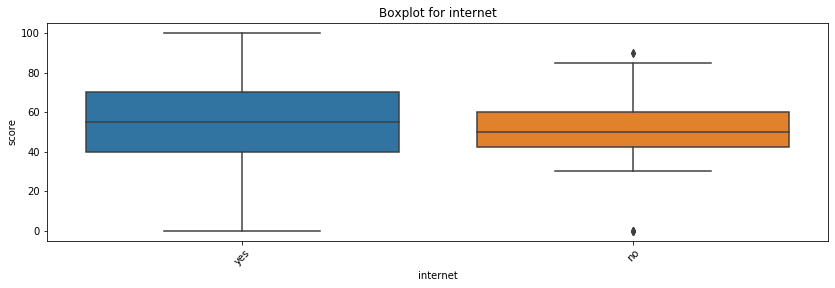

In [212]:
n = 22

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

Пропусков 35.
У большинства есть интернет.
Наличие интернета в среднем улучшает оценку, однако, возможно, если бы выборка была примерно равной, то и распределение было бы одинаковым. Статистически значимых различий не выявлено.

Столбец № 23 romantic является строковым
Первые 5 строк:


,romantic
0,no
1,no
2,NaN
3,yes
4,no


Количество уникальных значений:


,romantic
no,239
yes,124


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  363 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

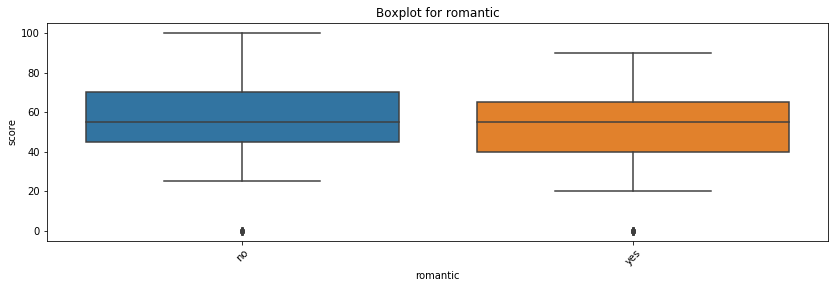

Найдены статистически значимые различия для колонки romantic


In [213]:
n = 23

inform(n)
get_boxplot(name_col[n])
get_stat_dif(name_col[n])

Пропусков 32.
Большинство не имеют романтических отношений.
Романтические отношения немного ухудшают успеваемость. Различия статистически значимы.

In [214]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 24 famrel является числовым
Первые 5 строк:


,famrel
0,4.0
1,5.0
2,4.0
3,3.0
4,4.0


Количество уникальных значений:


,famrel
4.0,182
5.0,98
3.0,62
2.0,17
1.0,7
-1.0,1


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,famrel
count,367.000000
mean,3.934605
std,0.926876
min,-1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF5608348>]],
      dtype=object)

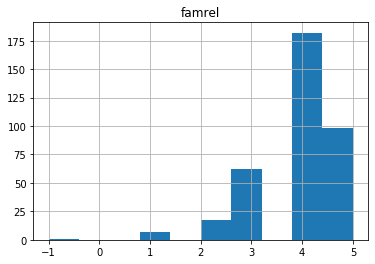

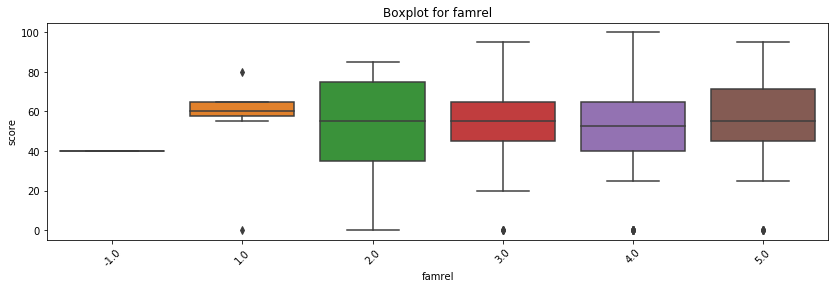

In [215]:
n = 24

inform(n)
get_boxplot(name_col[n])

Пустых значений 28.
Есть один вылет, заменим его на пустое значение. Вылет явно за пределами возможных значений.

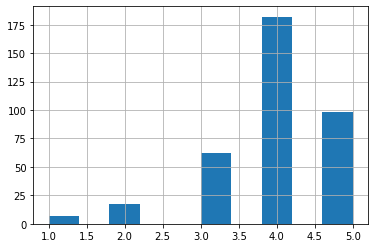

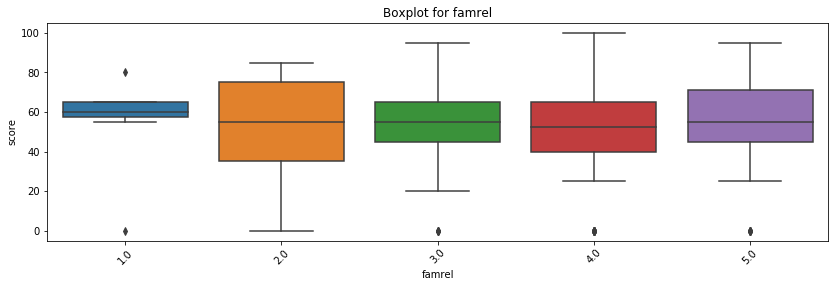

In [216]:
# Уберем вылет
stud_math.loc[stud_math['famrel'] < 0] = None
# Построим гистограмму
display(stud_math.famrel.hist())
# Ящик с усами
get_boxplot(name_col[n])

Большинство учеников характеризуют семейные отношения как хорошо (4).
Дети с отношениями в семье на "2" учатся не устойчиво. В среднем хорошо, однако скорее всего не будут набирать максимальный бал, а минимальные балы вполне ожидаемы.
Дети с отношениями в семье выше "3" не учатся плохо.
Далее проверим корреляцию это признака.

In [217]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 25 freetime является числовым
Первые 5 строк:


,freetime
0,3.0
1,3.0
2,3.0
3,2.0
4,3.0


Количество уникальных значений:


,freetime
3.0,153
4.0,112
2.0,61
5.0,38
1.0,18


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  382 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,freetime
count,382.000000
mean,3.238220
std,0.992521
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF58A4308>]],
      dtype=object)

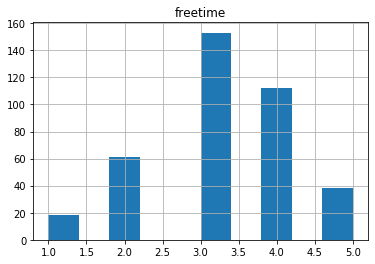

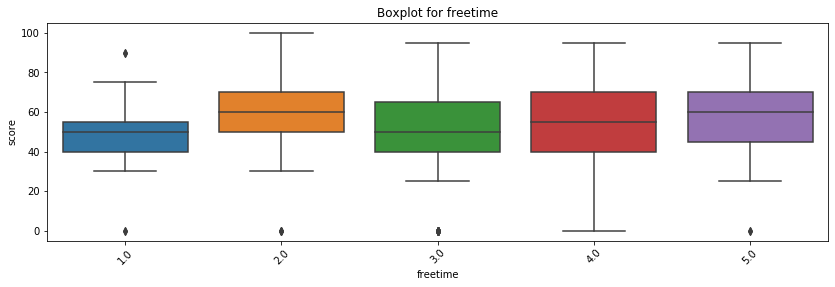

In [218]:
n = 25

inform(n)
get_boxplot(name_col[n])

Пустых значений 12.
Вылетов нет.
У болишнства свободного врмени на "3".
Отсутствие свободного времени после школы может оказать негативное влияние на успехи по математике.
У учеников с максимальным количеством свободного времени и временем на "2" больше шансов получить хорошие оценки.
Далее проверим корреляцию этого признака с результатами экзаменов.

In [219]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 26 goout является числовым
Первые 5 строк:


,goout
0,4.0
1,3.0
2,2.0
3,2.0
4,2.0


Количество уникальных значений:


,goout
3.0,127
2.0,99
4.0,84
5.0,52
1.0,23


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   385 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,goout
count,385.000000
mean,3.111688
std,1.115933
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF58C2408>]],
      dtype=object)

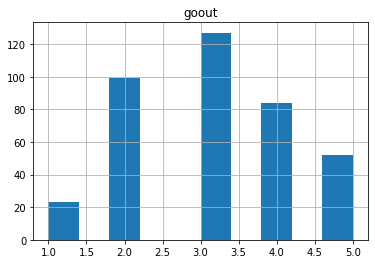

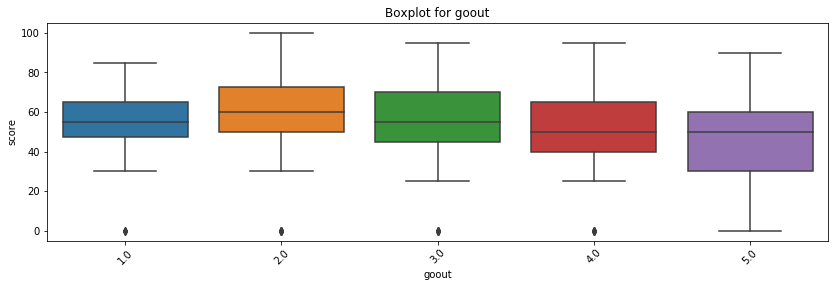

In [220]:
n = 26

inform(n)
get_boxplot(name_col[n])

Пустых значений 9.
Вылетов нет.
Болишнство оценивает количество времени, проведенного с друзьями на "3".
Ученик не должен проводить много времени с друзьями, но и без этого получать хорошие оценки невозможэно.
Лучшие оценки у учеников, оценивающих количество проведенного времени с друзьями на 2.
Далее проверим корреляуию этого признака с экзаменами.

In [221]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 27 health является числовым
Первые 5 строк:


,health
0,3.0
1,3.0
2,3.0
3,5.0
4,5.0


Количество уникальных значений:


,health
5.0,137
3.0,89
4.0,62
1.0,47
2.0,43


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  378 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,health
count,378.000000
mean,3.526455
std,1.397455
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF58648C8>]],
      dtype=object)

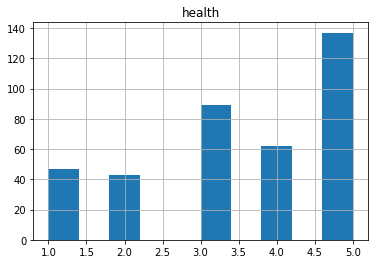

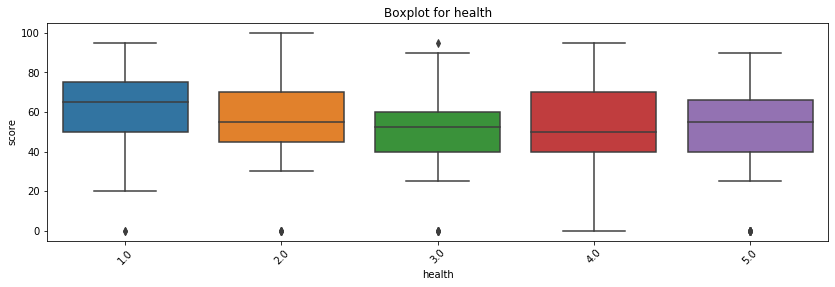

In [222]:
n = 27

inform(n)
get_boxplot(name_col[n])

Пустых значений 16.
Вылетов нет.
У болишнства хорошее здоровье.
Ученики с хорошим здоровьем учатся лучше, однако плохое здоровье не сильно ухудшает оценки.
Далее проверим корреляцию данного признака с результатами экзаменов.

In [223]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 28 absences является числовым
Первые 5 строк:


,absences
0,6.0
1,4.0
2,10.0
3,2.0
4,4.0


Количество уникальных значений:


,absences
0.0,111
2.0,60
4.0,52
6.0,31
8.0,21
10.0,17
12.0,12
14.0,11
3.0,8
16.0,7


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  381 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,absences
count,381.000000
mean,7.270341
std,23.523737
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,385.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF5432088>]],
      dtype=object)

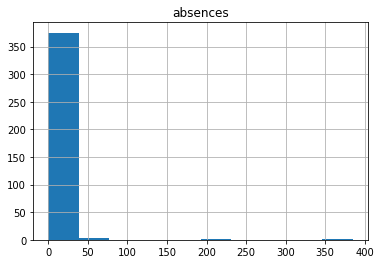

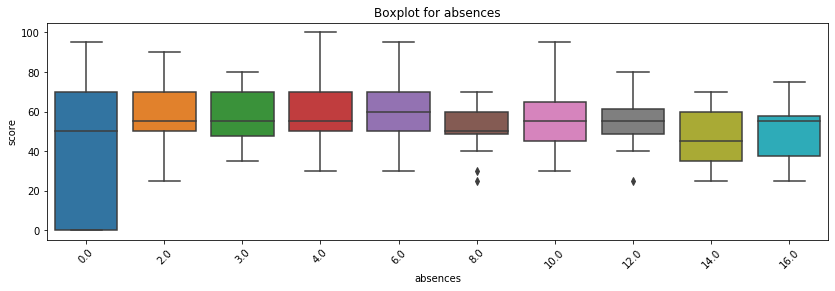

In [224]:
n = 28

inform(n)
get_boxplot(name_col[n])

Пустых значений 13.
Есть выбросы.
Большинство не пропускает.
Выбросы могут быть реальными значениями.
Количетсво пропусков как-то влияет на успеваемость, но возможно не прямопропорционально.
Далее проверим корреляцию данного признака с результатами экзамена.

In [225]:
## Ячейка для случая удаления выбросов.
## Почистим вылеты - заменим на пустые значения
#perc = stud_math.loc[:, ['absences']].describe()
#treshold = perc.loc['75%'].loc['absences'] + \
#    (perc.loc['75%'].loc['absences'] - perc.loc['25%'].loc['absences'])*1.5
#
#stud_math.loc[stud_math['absences'] > treshold] = None
## Построим гистограмму
#display(stud_math.absences.hist())

In [226]:
# пополняем список названий колонок, со значимыми параметрами.
significant.append(name_col[n])

Столбец № 29 score является числовым
Первые 5 строк:


,score
0,30.0
1,30.0
2,50.0
3,75.0
4,50.0


Количество уникальных значений:


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,30
60.0,30
70.0,27
45.0,27
80.0,16


Общая статистика:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Описательная статистика:


,score
count,387.000000
mean,52.273902
std,22.966464
min,0.000000
25%,40.000000
50%,55.000000
75%,70.000000
max,100.000000


Гистограмма


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF5628AC8>]],
      dtype=object)

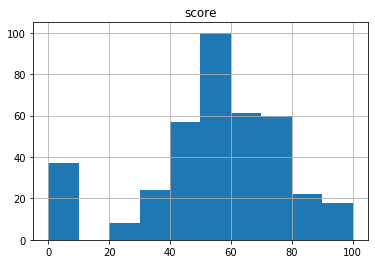

In [227]:
n = 29

inform(n)

Пустых значений 25.
Оценки имеют нормальное распределение, что хорошо.
Оценка 0 баллов находится за пределеами нормального распределения и может не учитываться. 
Стоит посмотреть, что общего у всех, кто получил 0

## Проверим как много пропусков в датасете

In [228]:
# Загружаем еще раз данные, чтобы понять как много пропусков в итоге
stud_math_1 = pd.read_csv('stud_math.csv')

# Создаем массив где правда - пропуск, ложь - заполненная ячейка
null_df = stud_math_1.isnull()

# Делаем тепловую карту
fig = px.imshow(null_df)
fig.show()

Видно, что пропуски распределены довольно равномерно по всему массиву. Явных "незаполнителей" нет.
Так же есть опасение, что если удалить строки с пропусками, то потеряем много полезных данных.
Пропуски оставим. Полностью заполнены столбцы "school", "sex" и "age".

# Подготовим датасет для финального анализа

In [229]:
# Следующие параметры считаю влияющими на оценки:
print('всего ', len(significant), 'параметров((а)', significant)

всего  16 параметров((а) ['age', 'address', 'Medu', 'Fedu', 'Mjob', 'traveltime', 'studytime', 'failures', 'studytime, granular', 'higher', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']


In [230]:
# Добавим столбец оценок в список влияющих параметров
significant.append('score')

In [231]:
# Создадим датафрейм из интересующих парамтеров
stud_math_sign = stud_math[significant]
# Удалим строки, где оценка равна 0, т.к. это значение выпадает из нормального распределения.
# Её проанализируем отдельно.
stud_math_sign_0 = stud_math_sign.loc[stud_math_sign['score'] == 0]
stud_math_sign_fin = stud_math_sign.loc[stud_math_sign['score'] > 0]

### Таким образом получили 2 массива. Один со значимыми переменными и без оценок 0, другой со всеми у кого оценка 0.

### Займемся финальным анализом данных.
#### Посмотрим корреляции числовых значений с итоговой оценкой
#### Проверим статистическую значимость номинативных переменных

In [232]:
# происследуем корреляцию оценки со всем числовыми данными для значимых параметров
stud_math_num = stud_math_sign_fin.loc[:, ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                                           'studytime, granular', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']]
display(round(stud_math_num.corr()['score'], 3))

age                   -0.133
Medu                   0.185
Fedu                   0.134
traveltime            -0.079
studytime              0.138
failures              -0.284
studytime, granular   -0.138
famrel                 0.030
freetime              -0.016
goout                 -0.186
health                -0.072
absences              -0.013
score                  1.000
Name: score, dtype: float64

Из таблицы видно, что половина данных плохо коррелирует с оценкой (значение по модулю меньше 0.1). Проиллюстрируем это ниже. Studytime, granular - обратный параметр к studytime, можно его не использовать.

In [233]:
display(abs(stud_math_num.corr()['score']) > 0.1)
# studytime, granular - обратная величина studytime, ее тоже удалим.

age                     True
Medu                    True
Fedu                    True
traveltime             False
studytime               True
failures                True
studytime, granular     True
famrel                 False
freetime               False
goout                   True
health                 False
absences               False
score                   True
Name: score, dtype: bool

In [256]:
# Создадим массив с данными, где корреляция составила больше 0.1 по модулю и не числовыми значениями, которые были сочтены за влияющие на оценку.
# Удалим все столбцы с низкой корреляцией.
stud_math_final = stud_math_sign_fin.drop(['traveltime', 'famrel', 'freetime', 'health', 'absences', 'studytime, granular'],  axis='columns')
# Создадим список названий колонок, пригодится для финального описания
final_columns = stud_math_final.columns
print('Осталось ', len(final_columns)-1, 'признаков, не считая итогового бала: ', final_columns)

Осталось  10 признаков, не считая итогового бала:  Index(['age', 'address', 'Medu', 'Fedu', 'Mjob', 'studytime', 'failures',
       'higher', 'romantic', 'goout', 'score'],
      dtype='object')


# Подведем итог

### В датафрейме "stud_math_final" собраны все параметры которые каким-либо образом влияют на результаты. В наборе данных удалены выбросы, а так же результаты экзамена равные нулю, как выпадающие из нормального распределения.

#### Параметр age:

age


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF549C388>]],
      dtype=object)

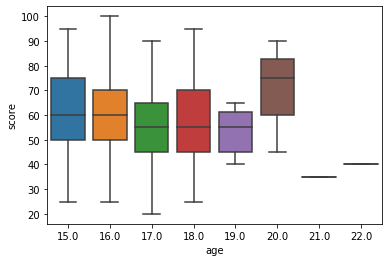

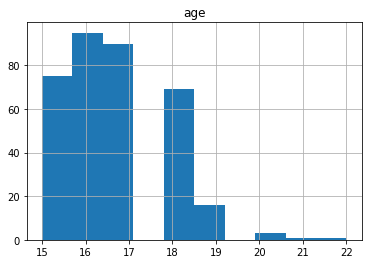

In [239]:
k = 0
print(final_columns[k])
# Боксплот
bx = sns.boxplot(x=final_columns[k], y="score", data=stud_math_final)
# Гистрограмма распределения параметра
stud_math_final.loc[:, [final_columns[k]]].hist()

### Чем младше ученик, тем лучше он учится (если его возраст менее 20, если более - зависимость не ясна)

address


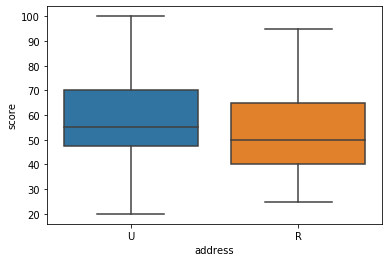

In [241]:
k = 1
print(final_columns[k])
# Боксплот
bx = sns.boxplot(x=final_columns[k], y="score", data=stud_math_final)

### Ученики, живущие в городе учатся лучше.

Medu


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF554A888>]],
      dtype=object)

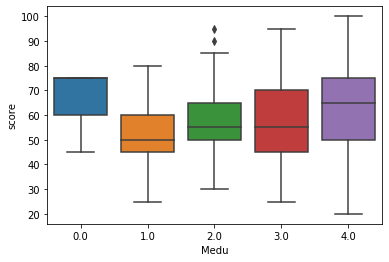

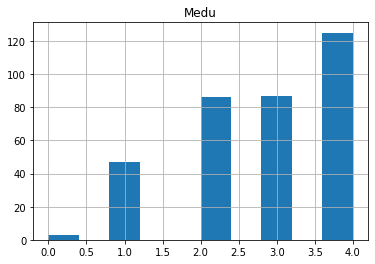

In [242]:
k = 2
print(final_columns[k])
# Боксплот
bx = sns.boxplot(x=final_columns[k], y="score", data=stud_math_final)
# Гистрограмма распределения параметра
stud_math_final.loc[:, [final_columns[k]]].hist()

### Чем выше образование матери, тем лучше оценки. Если у матери совсем нет образования - судить сложно.

Fedu


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF5B08088>]],
      dtype=object)

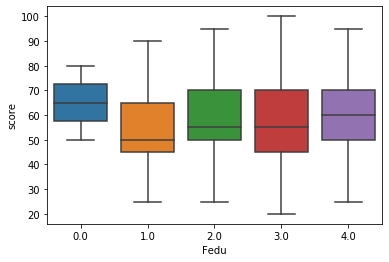

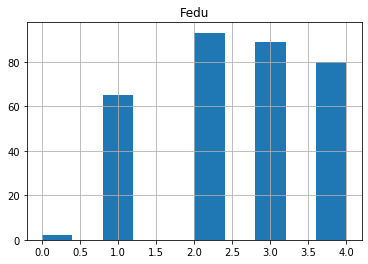

In [243]:
k = 3
print(final_columns[k])
# Боксплот
bx = sns.boxplot(x=final_columns[k], y="score", data=stud_math_final)
# Гистрограмма распределения параметра
stud_math_final.loc[:, [final_columns[k]]].hist()

### Чем выше образование отца, тем лучше оценки. Если у матери совсем нет образования - судить сложно.

Mjob


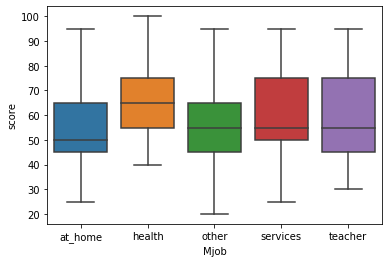

In [245]:
k = 4
print(final_columns[k])
# Боксплот
bx = sns.boxplot(x=final_columns[k], y="score", data=stud_math_final)

### Если мать ученика работает в сфере здравоохранения, его оценки выше.

studytime


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF5587188>]],
      dtype=object)

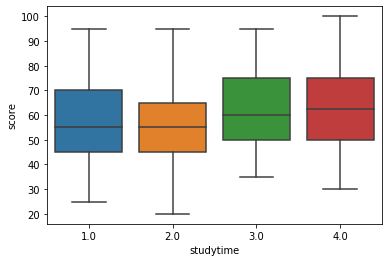

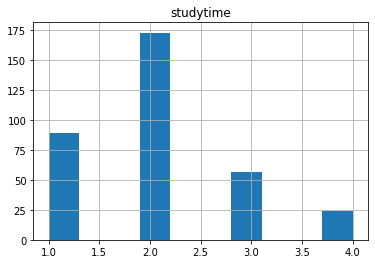

In [246]:
k = 5
print(final_columns[k])
# Боксплот
bx = sns.boxplot(x=final_columns[k], y="score", data=stud_math_final)
# Гистрограмма распределения параметра
stud_math_final.loc[:, [final_columns[k]]].hist()

### Чем больше ученик тратит времени на учебы вне школы, тем выше оценки.

failures


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF56562C8>]],
      dtype=object)

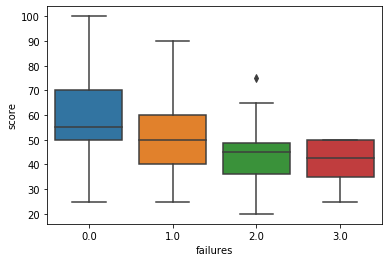

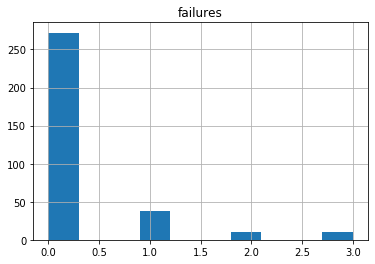

In [247]:
k = 6
print(final_columns[k])

# Боксплот
bx = sns.boxplot(x=final_columns[k], y="score", data=stud_math_final)
# Гистрограмма распределения параметра
stud_math_final.loc[:, [final_columns[k]]].hist()

### Важнейший параметр. Чем больше неудач терпит ученик вне школы, тем хуже его оценки. Параметр с самой высокой корреляцией.

higher


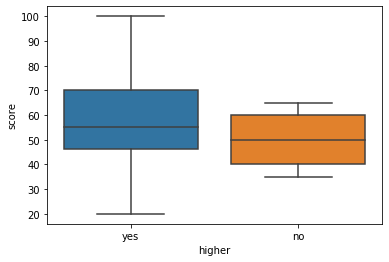

In [249]:
k = 7
print(final_columns[k])
# Боксплот
bx = sns.boxplot(x=final_columns[k], y="score", data=stud_math_final)

### Стремление к высшему образованию увеличивает оценку по математике.

romantic


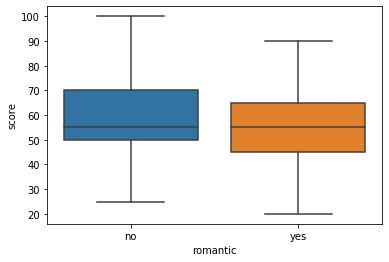

In [255]:
k = 8
print(final_columns[k])
# Боксплот
bx = sns.boxplot(x=final_columns[k], y="score", data=stud_math_final)

### Романтические отношения отрицательно сказываются на оценке.

goout


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF5C0DC48>]],
      dtype=object)

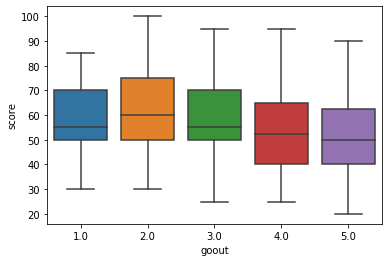

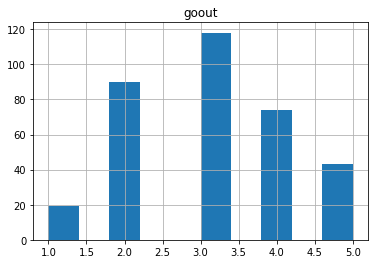

In [250]:
k = 9
print(final_columns[k])
# Боксплот
bx = sns.boxplot(x=final_columns[k], y="score", data=stud_math_final)
# Гистрограмма распределения параметра
stud_math_final.loc[:, [final_columns[k]]].hist()

### Чем больше ученик проводит времени на улице с друзьями, тем хуже его оценки, однако если ученик совсем не проводит время с друзьями, то его оценки так же не высоки. Лучший параметр = "2".

score


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FF5710D88>]],
      dtype=object)

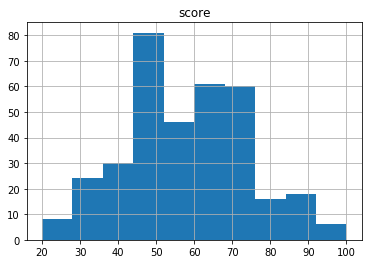

In [257]:
k = 10
print(final_columns[k])
# Гистрограмма распределения итоговой оценки
stud_math_final.loc[:, [final_columns[k]]].hist()

Выбросом считается значение превышающие 25 и 75 квартиль на 1,5 межквартильных размаха. 
Я не стал убирать формальные выбросы, а убрал только нелогичные значения. Выбросы так же стоит анализировать. Если у выбросов есть закономерность - значит это не выбросы. К сожалению не успел это происследовать. Так же хотелось бы происследовать тех, кто получил ноль баллов, возможно и там есть закономерность, но так же не успел.